<a href="https://colab.research.google.com/github/Smehta1234/neural_network-classification/blob/main/neural_network_classification_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
train_data.shape, test_labels.shape

((60000, 28, 28), (10000,))

In [5]:
train_data[0], train_labels[0]

(array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
           0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
           1,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
           0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
           0,   3],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
           0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
          10

In [6]:

class_name = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankleboot"]

In [7]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28, 28)),  # Specify the input shape here
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

model_1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

non_norm_history = model_1.fit(train_data,
                               tf.one_hot(train_labels,depth=10),
                               epochs=10,
                               validation_data=(test_data,tf.one_hot(test_labels,depth=10)))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.0984 - loss: 2.6642 - val_accuracy: 0.1000 - val_loss: 2.3028
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0987 - loss: 2.3032 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0986 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0985 - loss: 2.3028 - 

In [8]:
train_data.max()
train_data_norm = train_data/255.0
test_data_norm = test_data/255.0

In [9]:

tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28, 28)),  # Specify the input shape here
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

norm_history = model_2.fit(train_data_norm,
                           train_labels,
                           epochs=10,
                           validation_data=(test_data_norm,test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4767 - loss: 1.3207 - val_accuracy: 0.7354 - val_loss: 0.7056
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7529 - loss: 0.6659 - val_accuracy: 0.7655 - val_loss: 0.6343
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7764 - loss: 0.6082 - val_accuracy: 0.7750 - val_loss: 0.6099
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7856 - loss: 0.5844 - val_accuracy: 0.7797 - val_loss: 0.5969
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7928 - loss: 0.5704 - val_accuracy: 0.7853 - val_loss: 0.5882
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7973 - loss: 0.5607 - val_accuracy: 0.7910 - val_loss: 0.5792
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8015 - loss: 0.5531 - val_accuracy: 0.7932 - val_loss: 0.5749
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8040 - loss: 0.5473 - 

<Axes: title={'center': 'normalized data'}>

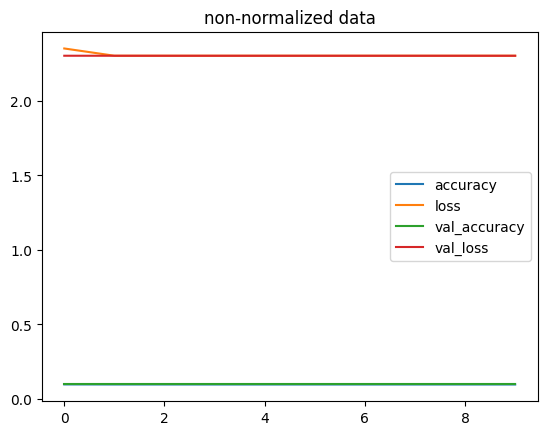

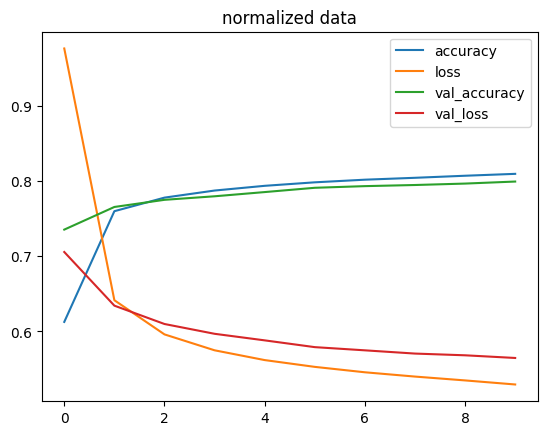

In [10]:
import pandas as pd
pd.DataFrame(non_norm_history.history).plot(title="non-normalized data")

pd.DataFrame(norm_history.history).plot(title="normalized data")

In [11]:
#finding ideal learning rate

tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28, 28)),  # Specify the input shape here
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch / 20))

final_lr__history = model_2.fit(train_data_norm,
                               train_labels,
                               epochs=40,
                               validation_data=(test_data_norm,test_labels),
                               callbacks = [lr_scheduler])

Epoch 1/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8174 - loss: 0.5194 - val_accuracy: 0.8011 - val_loss: 0.5592 - learning_rate: 1.0000e-04
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8187 - loss: 0.5167 - val_accuracy: 0.8019 - val_loss: 0.5583 - learning_rate: 1.1220e-04
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8188 - loss: 0.5157 - val_accuracy: 0.8034 - val_loss: 0.5576 - learning_rate: 1.2589e-04
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8189 - loss: 0.5148 - val_accuracy: 0.8040 - val_loss: 0.5571 - learning_rate: 1.4125e-04
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8192 - loss: 0.5139 - val_accuracy: 0.8036 - val_loss: 0.5567 - learning_rate: 1.5849e-04
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8196 - loss: 0.5132 - val_accuracy: 0.8046 - val_loss: 0.5564 - learning_rate: 1.7783e-04
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/ste

Text(0.5, 1.0, 'Learning Rate vs. Loss')

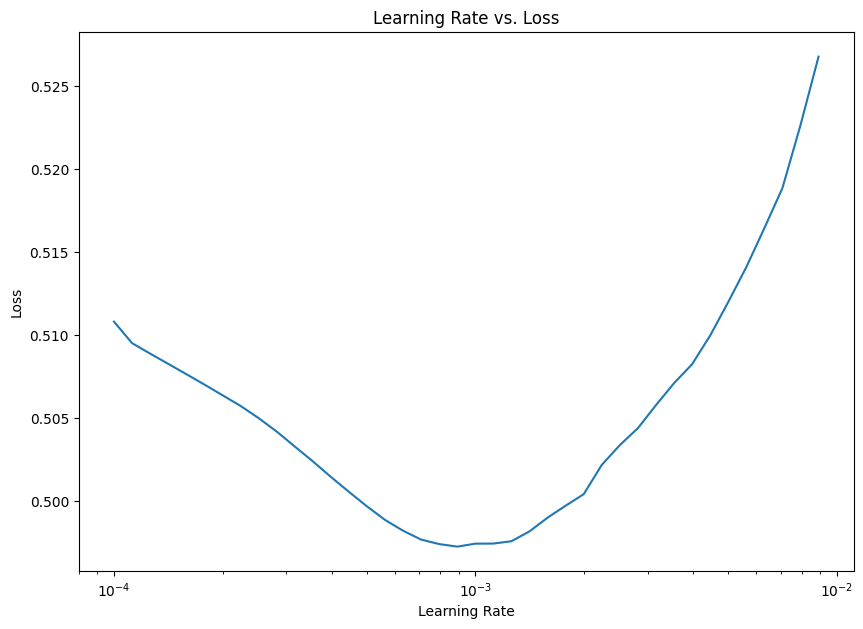

In [12]:
import numpy as np
import matplotlib.pyplot as plt
lrs = 1e-4 * (10 ** (np.arange(40) / 20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, final_lr__history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate vs. Loss")


In [13]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28, 28)),  # Specify the input shape here
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

model_4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

history_4 = model_2.fit(train_data_norm,
                           train_labels,
                           epochs=20,
                           validation_data=(test_data_norm,test_labels))

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8201 - loss: 0.5293 - val_accuracy: 0.8102 - val_loss: 0.5508
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8214 - loss: 0.5272 - val_accuracy: 0.8093 - val_loss: 0.5525
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8217 - loss: 0.5259 - val_accuracy: 0.8117 - val_loss: 0.5494
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8236 - loss: 0.5226 - val_accuracy: 0.8114 - val_loss: 0.5500
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8246 - loss: 0.5201 - val_accuracy: 0.8135 - val_loss: 0.5482
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8239 - loss: 0.5191 - val_accuracy: 0.8131 - val_loss: 0.5517
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8237 - loss: 0.5182 - val_accuracy: 0.8115 - val_loss: 0.5531
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8247 - loss: 0.5156 - 

<Axes: title={'center': 'normalized data'}>

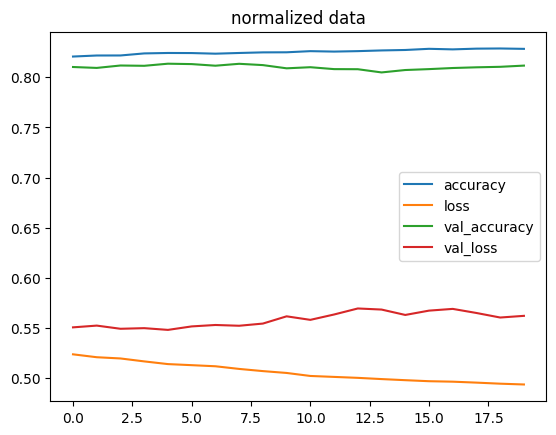

In [14]:
# now make a confysion metrix
import pandas as pd
pd.DataFrame(history_4.history).plot(title="normalized data")

In [15]:
y_prods = model_4.predict(test_data)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [16]:
y_prods[:5]

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 6.7791922e-12,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 9.9999994e-01,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 3.3395673e-37, 2.0064283e-18, 1.3952040e-03,
        7.2510696e-35, 0.0000000e+00, 0.0000000e+00, 9.9860477e-01,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 6.7947605e-32, 1.2255384e-38, 4.6490600e-11,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 9.9999994e-01,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 2.2606288e-23, 3.6133297e-30, 3.4090279e-11,
        1.6665079e-38, 0.0000000e+00, 0.0000000e+00, 9.9999994e-01,
        2.3883070e-33, 0.0000000e+00],
       [0.0000000e+00, 7.0891156e-15, 4.0193127e-19, 2.8829416e-07,
        2.4867753e-24, 0.0000000e+00, 0.0000000e+00, 9.9999970e-01,
        4.1433848e-21, 0.0000000e+00]], dtype=float32)

In [17]:
y_prods[0]

array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 6.7791922e-12,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 9.9999994e-01,
       0.0000000e+00, 0.0000000e+00], dtype=float32)

In [18]:
y_preds = y_prods.argmax(axis=1)
y_preds[:10]

array([7, 7, 7, 7, 7, 7, 3, 3, 0, 3])

In [19]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_labels, y_preds)
print(cm)



[[  0   0   0 312   0   0   0 688   0   0]
 [  0   0   0 163   0   0   0 837   0   0]
 [  0   0   0 649   0   0   0 351   0   0]
 [  0   0   0 255   0   0   0 745   0   0]
 [  0   0   0 678   0   2   0 320   0   0]
 [  1   0   0 528   0  26   0 445   0   0]
 [  0   0   0 694   0   8   0 298   0   0]
 [  0   0   0 535   0   1   0 464   0   0]
 [  0   0   0 874   0   1   0 125   0   0]
 [  0   0   0 477   0   1   0 522   0   0]]


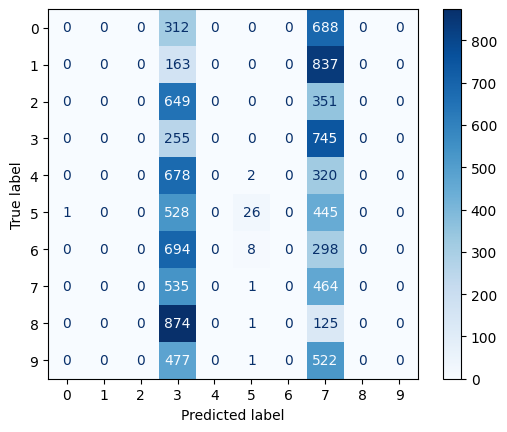

In [20]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [22]:
class_name

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankleboot']

In [23]:
 import random

 def plot_random_image(model, images, true_labels, classes):
    '''
    pick a random image ,plot it and label it with a prediction and true label
    '''
    i = random.randint(0, len(images))
    target_image = images[i]
    pred_probs = model.predict(target_image.reshape(1, 28, 28))
    pred_label = classes[pred_probs.argmax()]
    true_label = classes[true_labels[i]]

    plt.imshow(target_image, cmap=plt.cm.binary)

    #change the color of title depending on if the prediction is right or wrong
    if pred_label == true_label:
        color = "green"
    else:
        color = "red"

    plt.title(f"Pred: {pred_label} | True: {true_label}", color=color)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


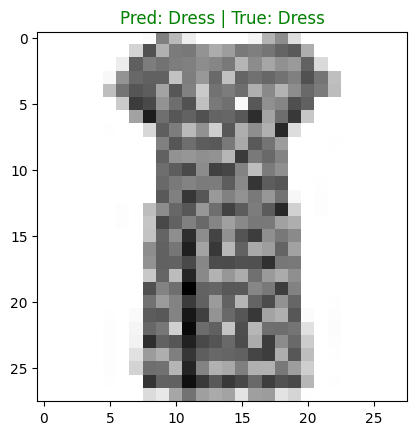

In [28]:
plot_random_image(model_4, test_data, test_labels, class_name)

what patter is our model

In [29]:
model_4.layers

[<Flatten name=flatten_3, built=True>,
 <Dense name=dense_9, built=True>,
 <Dense name=dense_10, built=True>,
 <Dense name=dense_11, built=True>]

In [30]:
# get the patterns of layer in our network
weights, biases = model_4.layers[1].get_weights()

weights, weights.shape

(array([[-0.07722418,  0.06989543, -0.06654593, -0.05452145],
        [-0.07507485,  0.06730863,  0.05691259,  0.01734419],
        [ 0.01924019, -0.07715788, -0.05219204,  0.04787682],
        ...,
        [-0.03729836,  0.07556513,  0.031351  , -0.01955034],
        [ 0.07758988, -0.02003083, -0.05925659, -0.02469869],
        [-0.05386059,  0.02686687, -0.02522184,  0.02750281]],
       dtype=float32),
 (784, 4))

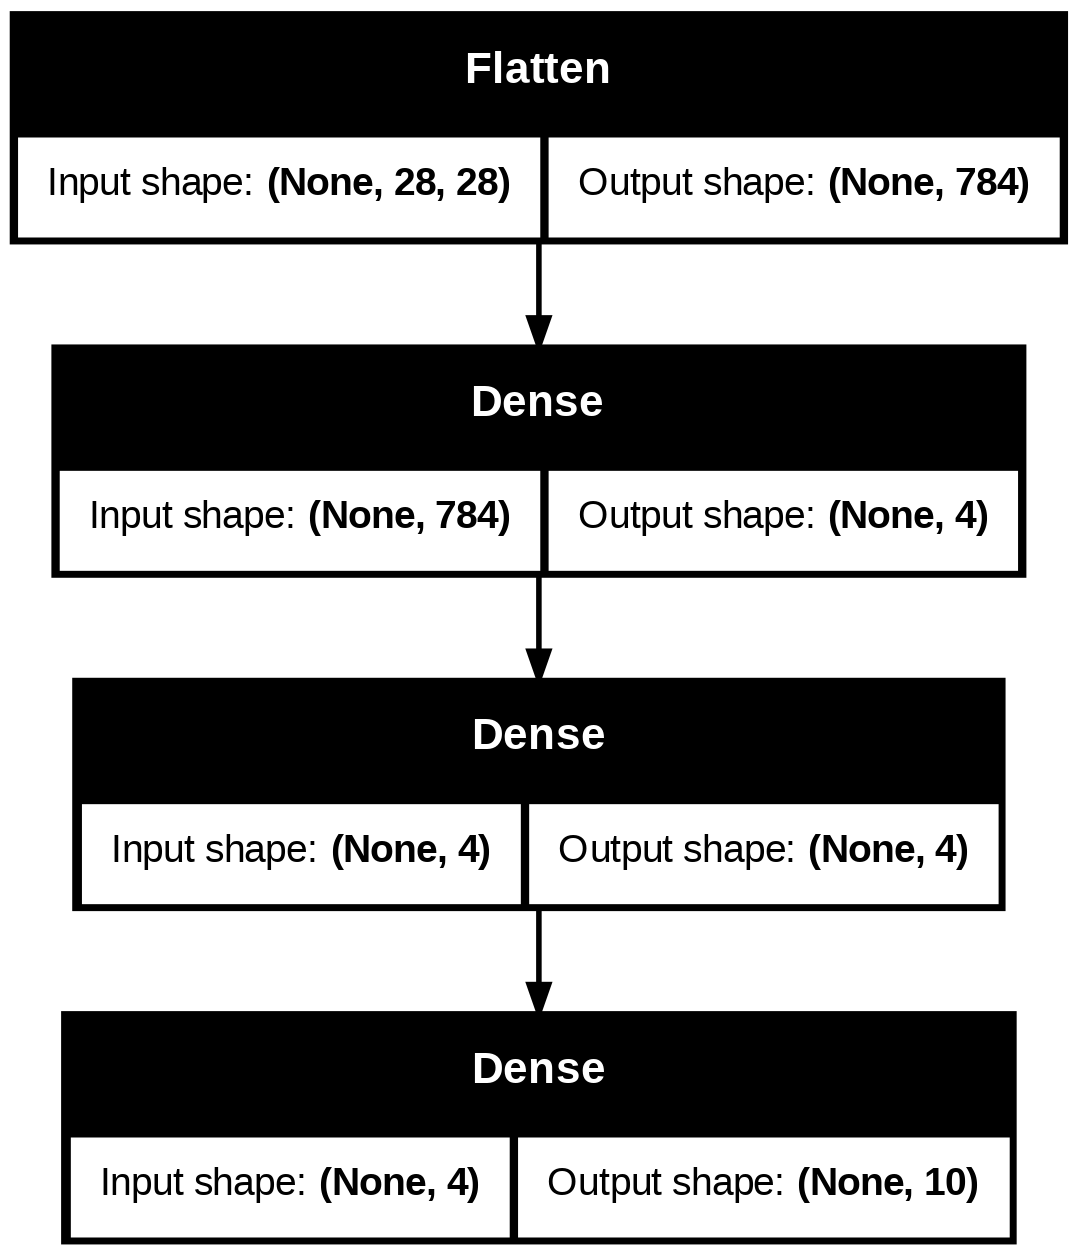

In [31]:
from tensorflow.keras.utils import plot_model
plot_model(model_4, show_shapes=True)